## KAN RL

In [1]:
!pip install moviepy~=1.0.3 pykan~=0.0.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.3/388.3 kB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.9/26.9 MB 60.2 MB/s eta 0:00:00
  Created wheel for moviepy: filename=moviepy-1.0.3-py3-none-any.whl size=110720 sha256=1383cbbe429aa3cc3e446890cb3329b1db6ce11de33e8c14b6c8a527e7f4b29b
  Stored in directory: /root/.cache/pip/wheels/96/32/2d/e10123bd88fbfc02fed53cc18c80a171d3c87479ed845fa7c1
Successfully built moviepy
  Attempting uninstall: decorator
    Found existing installation: decorator 5.1.1
    Uninstalling decorator-5.1.1:
      Successfully uninstalled decorator-5.1.1


## Models

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import Subset, DataLoader
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import Subset, DataLoader
import numpy as np
import os
import moviepy.video.io.ImageSequenceClip  # moviepy == 1.0.3

# Check if GPU is available and set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Define the transformation
transform = transforms.Compose([
    transforms.Resize((8, 8)),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Load the full MNIST dataset
mnist_train = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
mnist_test = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Define the number of samples you want to use
num_samples = 100

# Create subsets of the dataset
train_indices = np.random.choice(len(mnist_train), num_samples, replace=False)
test_indices = np.random.choice(len(mnist_test), num_samples, replace=False)

mnist_train = Subset(mnist_train, train_indices)
mnist_test = Subset(mnist_test, test_indices)

# Instead of accessing `.data`, we should use the dataset as it is intended with indexing
train_images = torch.stack([mnist_train[i][0] for i in range(len(mnist_train))])
train_labels = torch.tensor([mnist_train[i][1] for i in range(len(mnist_train))])
test_images = torch.stack([mnist_test[i][0] for i in range(len(mnist_test))])
test_labels = torch.tensor([mnist_test[i][1] for i in range(len(mnist_test))])

# Flatten the images (2x2 -> 4)
train_images = train_images.view(train_images.size(0), -1)
test_images = test_images.view(test_images.size(0), -1)

# Move data to GPU
train_images = train_images.to(device)
test_images = test_images.to(device)
train_labels = train_labels.to(device)
test_labels = test_labels.to(device)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 14564073.56it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 429460.21it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4061038.32it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 2496138.47it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [3]:
train_images.shape

torch.Size([100, 64])

In [4]:
# Convert data to tensors
dataset = {
    'train_input': train_images,
    'test_input': test_images,
    'train_label': train_labels.view(-1, 1),
    'test_label': test_labels.view(-1, 1)
}
print(dataset)
# Confirm the shapes of tensors
print(dataset['train_input'].shape, dataset['train_label'].shape)

{'train_input': tensor([[-0.4242, -0.4242, -0.4242,  ..., -0.3733, -0.4242, -0.4242],
        [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
        [-0.4242, -0.4242, -0.4242,  ..., -0.2206, -0.4242, -0.4242],
        ...,
        [-0.4242, -0.4242, -0.3988,  ..., -0.4242, -0.4242, -0.4242],
        [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
        [-0.4242, -0.4242, -0.3860,  ..., -0.4115, -0.4242, -0.4242]],
       device='cuda:0'), 'test_input': tensor([[-0.4242, -0.4242, -0.4242,  ..., -0.2969, -0.4242, -0.4242],
        [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
        [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
        ...,
        [-0.4242, -0.4242, -0.3988,  ..., -0.4242, -0.4242, -0.4242],
        [-0.4242, -0.4242, -0.4242,  ..., -0.3606, -0.4242, -0.4242],
        [-0.4242, -0.4242, -0.2715,  ..., -0.4242, -0.4242, -0.4242]],
       device='cuda:0'), 'train_label': tensor([[4],
        [8],
        [4]

In [5]:
device

device(type='cuda')

In [6]:
# Model training setup (example using KAN library)
from kan import KAN

model = KAN(width=[64, 8, 10], grid=3, k=3, device=device)

In [7]:
def train_acc():
    return torch.mean((torch.round(model(dataset['train_input'])[:,0]) == dataset['train_label'][:,0]).float())

def test_acc():
    return torch.mean((torch.round(model(dataset['test_input'])[:,0]) == dataset['test_label'][:,0]).float())


image_folder = 'video_img'

results = model.train(dataset, opt="Adam", steps=5, save_fig=True, beta=7, out_vars=[0,1,2,3,4,5,6,7,8,9], img_folder=image_folder, device=device);

train loss: 3.32e+01 | test loss: 7.05e+00 | reg: 2.62e+03 : 100%|███| 5/5 [10:10<00:00, 122.03s/it]


In [8]:

import os
import numpy as np
import moviepy.video.io.ImageSequenceClip # moviepy == 1.0.3

fps=5

fps = fps
files = os.listdir('/kaggle/working/video_img/')
train_index = []
for file in files:
    if file[0].isdigit() and file.endswith('.jpg'):
        train_index.append(int(file[:-4]))

train_index = np.sort(train_index)

image_files = [image_folder+'/'+str(train_index[index])+'.jpg' for index in train_index]

clip = moviepy.video.io.ImageSequenceClip.ImageSequenceClip(image_files, fps=fps)
# clip.write_videofile(video_name+'.mp4')
clip.write_gif("symbolic_formula.gif")

MoviePy - Building file symbolic_formula.gif with imageio.


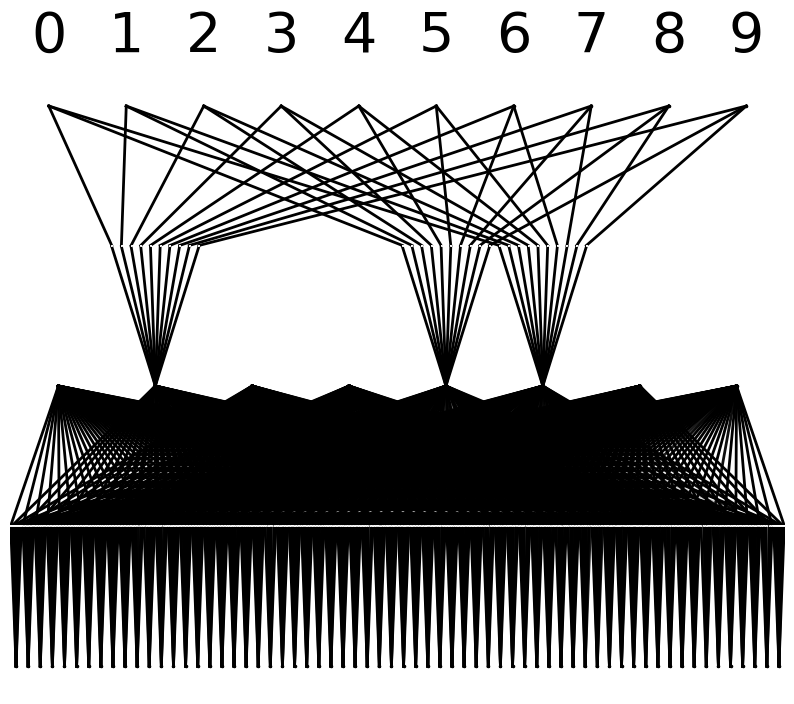

In [9]:
# Initial plot of the model
model(dataset['train_input'])  # Perform a forward pass to initialize
model.plot(beta=100, scale=1, out_vars=[0,1,2,3,4,5,6,7,8,9])  # Adjust beta and scale as needed